In [13]:
''' 2. Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. 
Apply filters to exclude apps with fewer than 10,000 installs and revenue below $10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyone and app name should not have more than 30 characters including space and special character .
This graph should work only between 1 PM IST to 2 PM IST apart from that time we should not show this graph in dashboard itself.'''

' 2. Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. \nApply filters to exclude apps with fewer than 10,000 installs and revenue below $10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyone and app name should not have more than 30 characters including space and special character .\nThis graph should work only between 1 PM IST to 2 PM IST apart from that time we should not show this graph in dashboard itself.'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from datetime import datetime, time

In [15]:
apps_df = pd.read_csv("E:/Data Analyst Intern Tasks/Jupyter/Cleaned Datasets/Cleaned_GooglePlaystore.csv")

In [16]:
# Define a function to generate the chart
def generate_chart():
    current_time = datetime.now().time()
    allowed_start = time(13, 0)  
    allowed_end = time(14, 0)    

    for widget in chart_frame.winfo_children():
        widget.destroy()  # Clear old charts

    if allowed_start <= current_time <= allowed_end:
        df = apps_df.copy()

        # Size to MB
        df['Size_MB'] = pd.to_numeric(df['Size'], errors='coerce')

        # Extract Android version (float)
        df['Android Ver'] = df['Android Ver'].astype(str).str.extract(r'(\d+\.\d+)')
        df['Android Ver'] = pd.to_numeric(df['Android Ver'], errors='coerce')

        # Convert installs and revenue to numeric
        df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
        df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

        # Apply filters
        filtered_df = df[
            (df['Installs'] > 10000) &
            (df['Revenue'] > 10000) &
            (df['Android Ver'] > 4.0) &
            (df['Size_MB'] > 15) &
            (df['Content Rating'] == 'Everyone') &
            (df['App'].astype(str).str.len() <= 30)
        ].copy()

        # Top 3 categories
        top_categories = filtered_df['Category'].value_counts().nlargest(3).index.tolist()
        filtered_df = filtered_df[filtered_df['Category'].isin(top_categories)]

        # Group and summarize
        summary = filtered_df.groupby(['Category', 'Type']).agg({
            'Installs': 'mean',
            'Revenue': 'mean'
        }).reset_index()

        # Create Figure
        fig, ax1 = plt.subplots(figsize=(12, 7))
        ax2 = ax1.twinx()

        # Plot Installs (bar)
        for t in ['Free', 'Paid']:
            sub = summary[summary['Type'] == t]
            ax1.bar(sub['Category'] + ' (' + t + ')', sub['Installs'], alpha=0.7, label=f'{t} - Installs')

        ax1.set_ylabel('Average Installs', color='tab:blue')
        ax1.set_xlabel('App Categories (Type)')
        ax1.tick_params(axis='y', labelcolor='tab:blue')
        ax1.tick_params(axis='x', rotation=30)

        # Plot Revenue (line)
        for t in ['Free', 'Paid']:
            sub = summary[summary['Type'] == t]
            ax2.plot(sub['Category'] + ' (' + t + ')', sub['Revenue'], marker='o', label=f'{t} - Revenue', color='tab:green')

        ax2.set_ylabel('Average Revenue ($)', color='tab:green')
        ax2.tick_params(axis='y', labelcolor='tab:green')

        # Title & Grid
        fig.suptitle('Average Installs and Revenue for Free vs. Paid Apps (Top 3 Categories)')
        fig.tight_layout()
        fig.subplots_adjust(top=0.88)
        ax1.grid(True, linestyle='--', linewidth=0.5, axis='y')

        # Embed in Tkinter
        canvas = FigureCanvasTkAgg(fig, master=chart_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    else:
        msg = tk.Label(chart_frame, text="Graph display is only available between 1 PM to 2 PM IST.", font=("Arial", 14), fg="red")
        msg.pack(pady=50)

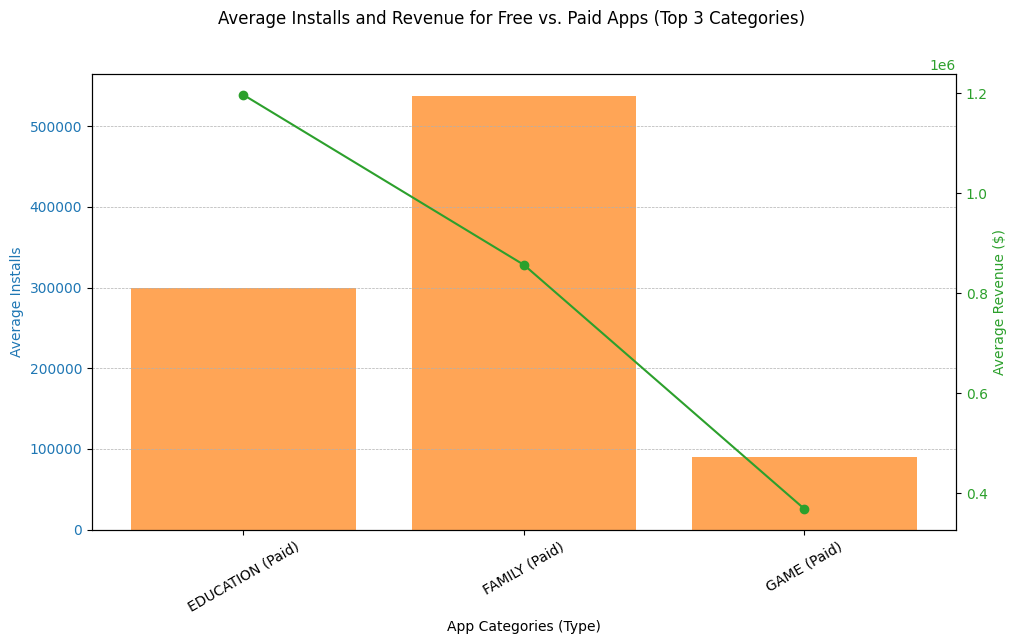

In [17]:
root = tk.Tk()
root.title("App Analytics Dashboard")
root.geometry("1000x700")

title = tk.Label(root, text="App Performance Analysis", font=("Arial", 20, 'bold'))
title.pack(pady=10)

chart_frame = tk.Frame(root)
chart_frame.pack(fill=tk.BOTH, expand=True)

# Trigger chart generation on load
generate_chart()
root.mainloop()